In [16]:
import numpy
from numpy import asarray
import json

In [17]:
import mpld3
import matplotlib.pyplot as plt
mpld3.enable_notebook()
# %matplotlib inline

In [18]:
filepath = 'output.json'
with open(filepath, 'r') as f:
    js = json.load(f)
signal = asarray(js['signal'])
output = asarray(js['output'])

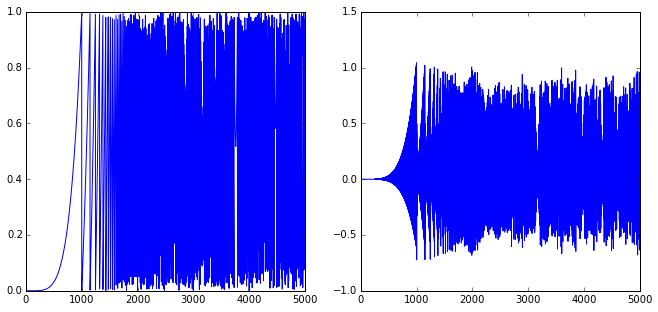

In [19]:
fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(121)
ax.plot(signal)
ax = fig.add_subplot(122)
ax.plot(output)
plt.show()